In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## Data

### *Read in the Data...*

Data from https://hastie.su.domains/ElemStatLearn/

Normalized handwritten digits, automatically
scanned from envelopes by the U.S. Postal Service. The original
scanned digits are binary and of different sizes and orientations; the
images  here have been deslanted and size normalized, resulting
in 16 x 16 grayscale images (Le Cun et al., 1990).

The first column stands for the response (Y ) and the other columns stand for the independent variables (Xi’s).

In [40]:
import gzip

### TESTING DATA...
with gzip.open('Data/zip.test.gz', 'rb') as f:
    df_testing = pd.read_csv(f,delim_whitespace=True, header=None)
    
### TRAINING DATA...
with gzip.open('Data/zip.train.gz', 'rb') as f:
    df_training = pd.read_csv(f,delim_whitespace=True, header=None)

In [43]:
df_testing.head(2)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.0,-1.0,-0.948,-0.561,0.148,0.384,...,-1.0,-0.908,0.43,0.622,-0.973,-1.0,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.0,-1.000,-1.00,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0


In [44]:
df_training.head(2)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0


### *Separate into 2 and 7's only !*

Want to build a model that can determine a 2 vs. a 7 value !

In [45]:
df_training.shape

(7291, 257)

In [46]:
df_training27 = df_training[(df_training[0] == 2) |
                          (df_training[0] == 7)].reset_index(drop=True)

In [47]:
df_training27.shape

(1376, 257)

In [72]:
# Heres an example of a row whos y is a 7!
df_training27.loc[:0, df_training27.columns !=0]

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.273,0.684,0.96,0.45,-0.067,...,-0.318,1.0,0.536,-0.987,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [73]:
# Heres an example of a row whos y is a 2 !
df_training27.loc[10:10, df_training27.columns !=0]

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
10,-1.0,-1.0,-1.0,-1.0,-1.0,-0.798,0.3,0.432,-0.799,-1.0,...,-0.947,-0.524,0.307,0.39,0.852,0.751,0.99,0.567,-0.664,-1.0


In [74]:
# Turn the first row into an array
# need to drop the first column of the above df becuase that is the answer!
# Turn this into an array to be able to reshape it as a 16x16 image !
example7 = np.array(df_training27.loc[:0, df_training27.columns !=0].values.flatten().tolist())

In [75]:
# Turn the first row into an array
# need to drop the first column of the above df becuase that is the answer!
# Turn this into an array to be able to reshape it as a 16x16 image !
example2 = np.array(df_training27.loc[10:10, df_training27.columns !=0].values.flatten().tolist())

In [76]:
def plot_digit(image_data):
    image = image_data.reshape(16, 16)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

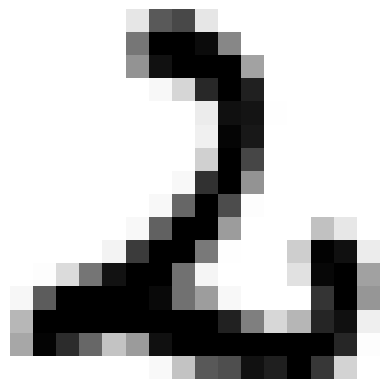

In [77]:
# Plot the 2
plot_digit(example2)
plt.show()

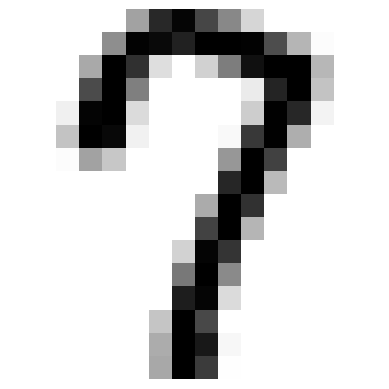

In [78]:
# plot the 7 !
plot_digit(example7)
plt.show()

### *Split Testing Data to X and y*

In [79]:
y_test = np.array(df_training27.iloc[:,0].tolist()) # List of the answers

In [80]:
X_test = np.array(df_training27.drop(columns = 0)) # list of the data

## Linear Regression Model

In [81]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(X_test, y_test)

SGDClassifier(random_state=1)

In [82]:
# Check our model on the example 7 !
sgd_clf.predict([example7])

array([7.])

In [83]:
# Check our model on the example 2 !
sgd_clf.predict([example2])

array([2.])

### KNN Model

Try k = 1, 3, 5, 7, 9, 11, 13, and 15

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_test, y_test)

KNeighborsClassifier(n_neighbors=1)

In [86]:
# Check our model on the example 7 !
knn1.predict([example7])

array([7.])

In [87]:
# Check our model on the example 2 !
knn1.predict([example2])

array([2.])

### Check the Performance